## **Teamleden**

|Teamleden|GitHub Username|
|--|--|
|Nima Ghafar|NimaGhafar|
|Busse Heemskerk|BJHeemskerk|
|Henry Lau||
|Jesse van Leeuwen|22096337|

# *Foto Herkennings app*

In dit notebook zal de pipeline worden opgesteld waarmee data kan worden ingeladen en het model mee wordt getraind, gedeployed en gehertraind.

-verdere opdrachtomschrijving-

-inhoudsopgave-

## Inladen van de libaries en de data

In [45]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2


In [14]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os
os.chdir('/content/drive/My Drive//mlops/MLOps_2024')

## Begin data-ingestion pipeline

Om de data in te kunnen laden wordt er gebruik gemaakt van verschillende functies om de juiste afbeeldingspaden in de juiste dataframes te zetten. Zo zijn de train, test en validatie afbeeldingen gesplitst in drie verschillende dataframes.

In [38]:
# Functie om afbeeldingen te lezen vanuit een txt bestand
def read_image_filenames(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    return lines

# Functie om lemma tokens in te lezen
def read_tokens(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    tokens_dict = {}
    for line in lines:
        parts = line.split()
        image_token = parts[0].split('#')[0]
        tokens = parts[1:]
        tokens_dict[image_token] = tokens
    return tokens_dict

# Functie om afbeeldingen in DataFrames te laden
def load_images_into_dataframes(data_dir, label_dir, labels_file, train_file, test_file, val_file):
    # Lezen van bestandsnamen uit txt bestanden
    train_filenames = read_image_filenames(os.path.join(label_dir, train_file))
    test_filenames = read_image_filenames(os.path.join(label_dir, test_file))
    val_filenames = read_image_filenames(os.path.join(label_dir, val_file))

    # Inlezen van alle tokens
    tokens_dict = read_tokens(os.path.join(label_dir, labels_file))

    # Aanmaken DataFrames
    train_df = pd.DataFrame({'filename': train_filenames})
    test_df = pd.DataFrame({'filename': test_filenames})
    val_df = pd.DataFrame({'filename': val_filenames})

    # Toevoegen van volledige file_paths
    train_df['filepath'] = train_df['filename'].apply(lambda x: os.path.join(data_dir, x))
    test_df['filepath'] = test_df['filename'].apply(lambda x: os.path.join(data_dir, x))
    val_df['filepath'] = val_df['filename'].apply(lambda x: os.path.join(data_dir, x))

    # Toevoegen van afbeeldingen in numpy arrays
    train_df['image'] = train_df['filepath'].apply(lambda x: np.array(Image.open(x)))
    test_df['image'] = test_df['filepath'].apply(lambda x: np.array(Image.open(x)))
    val_df['image'] = val_df['filepath'].apply(lambda x: np.array(Image.open(x)))


    # Toevoegen van de juiste labels aan de juiste dataframes
    train_df['labels'] = train_df['filename'].apply(lambda x: tokens_dict.get(x, []))
    test_df['labels'] = test_df['filename'].apply(lambda x: tokens_dict.get(x, []))
    val_df['labels'] = val_df['filename'].apply(lambda x: tokens_dict.get(x, []))


    return train_df, test_df, val_df

# Toewijzen van alle paden
data_directory = 'Images'
label_directory = 'Label_files'
labels_file = 'Flickr8k.token.txt'
train_file_path = 'Flickr_8k.trainImages.txt'
test_file_path = 'Flickr_8k.testImages.txt'
val_file_path = 'Flickr_8k.devImages.txt'

# Laden van afbeeldingen in datasets
train_df, test_df, val_df = load_images_into_dataframes(
    data_directory, label_directory, labels_file, train_file_path, test_file_path, val_file_path
    )

# Tonen van de datasets
print("Train DataFrame:")
display(train_df.head())

print("\nTest DataFrame:")
display(test_df.head())

print("\nValidation DataFrame:")
display(val_df.head())


Train DataFrame:


,filename,filepath,image,labels
0,2513260012_03d33305cf.jpg,Images\2513260012_03d33305cf.jpg,"[[[38, 31, 25], [64, 50, 49], [78, 73, 67], [2...","[Two, dogs, running, through, a, low, lying, b..."
1,2903617548_d3e38d7f88.jpg,Images\2903617548_d3e38d7f88.jpg,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","[The, little, boy, is, playing, with, a, croqu..."
2,3338291921_fe7ae0c8f8.jpg,Images\3338291921_fe7ae0c8f8.jpg,"[[[146, 143, 154], [149, 143, 155], [153, 142,...","[A, dog, with, something, pink, in, its, mouth..."
3,488416045_1c6d903fe0.jpg,Images\488416045_1c6d903fe0.jpg,"[[[121, 158, 202], [117, 154, 198], [118, 155,...","[The, large, brown, dog, is, running, on, the,..."
4,2644326817_8f45080b87.jpg,Images\2644326817_8f45080b87.jpg,"[[[168, 182, 209], [169, 183, 210], [168, 184,...","[The, black, dog, is, dropping, a, red, disc, ..."



Test DataFrame:


,filename,filepath,image,labels
0,3385593926_d3e9c21170.jpg,Images\3385593926_d3e9c21170.jpg,"[[[29, 33, 44], [38, 42, 53], [34, 38, 49], [2...","[Two, dogs, playing, in, the, snow, .]"
1,2677656448_6b7e7702af.jpg,Images\2677656448_6b7e7702af.jpg,"[[[0, 61, 174], [0, 60, 169], [0, 60, 167], [1...","[The, small, brown, and, white, dog, is, in, t..."
2,311146855_0b65fdb169.jpg,Images\311146855_0b65fdb169.jpg,"[[[253, 253, 253], [254, 254, 254], [255, 255,...","[Two, people, are, dancing, with, drums, on, t..."
3,1258913059_07c613f7ff.jpg,Images\1258913059_07c613f7ff.jpg,"[[[12, 24, 46], [18, 22, 51], [16, 20, 49], [1...","[Three, people, sit, at, a, picnic, table, out..."
4,241347760_d44c8d3a01.jpg,Images\241347760_d44c8d3a01.jpg,"[[[89, 90, 84], [90, 91, 86], [89, 90, 85], [8...","[The, American, footballer, is, wearing, a, re..."



Validation DataFrame:


,filename,filepath,image,labels
0,2090545563_a4e66ec76b.jpg,Images\2090545563_a4e66ec76b.jpg,"[[[174, 182, 185], [169, 177, 180], [164, 172,...","[two, young, children, on, a, skateboard, goin..."
1,3393035454_2d2370ffd4.jpg,Images\3393035454_2d2370ffd4.jpg,"[[[153, 159, 159], [168, 173, 166], [125, 126,...","[Child, in, blue, and, grey, shirt, jumping, o..."
2,3695064885_a6922f06b2.jpg,Images\3695064885_a6922f06b2.jpg,"[[[43, 52, 49], [36, 45, 40], [39, 48, 43], [3...","[The, woman, is, leading, a, dog, through, an,..."
3,1679557684_50a206e4a9.jpg,Images\1679557684_50a206e4a9.jpg,"[[[70, 91, 74], [79, 92, 82], [78, 94, 81], [6...","[Two, dogs, playing, with, a, tennis, ball, in..."
4,3582685410_05315a15b8.jpg,Images\3582685410_05315a15b8.jpg,"[[[119, 154, 212], [120, 155, 211], [122, 154,...","[Two, women, in, bathing, suits, climb, rock, ..."


Nu de datasets zijn ingeladen kan er gekeken worden naar verschillende vormen van Feature Engineering. Aangezien de token het makkelijkste zijn om te onderzoeken, zullen we hier eerst naar gaan kijken.

In [39]:
# Het tonen van een token
train_df['labels'][0]

['Two',
 'dogs',
 'running',
 'through',
 'a',
 'low',
 'lying',
 'body',
 'of',
 'water',
 '.']

Zoals er te zien is, is er verschillende informatie beschikbaar over de informatie. Volgens de tokens bevat de afbeelding twee honden die door een kleine plas water rennen. Echter bevat de caption ook nog een punt aan het einde. Deze is overbodig en lijdt tot overbodige informatie naar het model.

In [40]:
train_df['labels'] = train_df['labels'].apply(lambda x: [word for word in x if word != '.'])
train_df['labels'][0]

['Two',
 'dogs',
 'running',
 'through',
 'a',
 'low',
 'lying',
 'body',
 'of',
 'water']

In [46]:
# Feature Engineering op de dataset

# Functie om de lengte van de zinnen te berekenen
def calculate_sentence_length(sentence):
    return len(sentence.split())

#Functie om de frequentie van woorden te berekenen
def calculate_word_frequencies(sentence):
    word_freq = {}
    for word in sentence:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return word_freq

# Functie om een kleurhistogram te berekenen
def calculate_color_histogram(image, bins=(8, 8, 8)):
    histogram = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    return cv2.normalize(histogram, histogram).flatten()

# Functie om textuurkenmerken te berekenen
def calculate_texture_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    xgrad = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    ygrad = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    return np.array([xgrad, ygrad]).flatten()



train_df['sentence_length'] = train_df['labels'].apply(lambda x: calculate_sentence_length(' '.join(x)))
train_df['word_frequencies'] = train_df['labels'].apply(calculate_word_frequencies)
train_df['color_histogram'] = train_df['image'].apply(calculate_color_histogram)
train_df['texture_features'] = train_df['image'].apply(calculate_texture_features)



train_df.head()


,filename,filepath,image,labels,sentence_length,word_frequencies,color_histogram,texture_features
0,2513260012_03d33305cf.jpg,Images\2513260012_03d33305cf.jpg,"[[[38, 31, 25], [64, 50, 49], [78, 73, 67], [2...","[Two, dogs, running, through, a, low, lying, b...",10,"{'Two': 1, 'dogs': 1, 'running': 1, 'through':...","[0.28965902, 0.0012639667, 0.0, 0.0, 0.0, 0.0,...","[0.0, -244.0, -1730.0, -2086.0, -592.0, 810.0,..."
1,2903617548_d3e38d7f88.jpg,Images\2903617548_d3e38d7f88.jpg,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","[The, little, boy, is, playing, with, a, croqu...",14,"{'The': 1, 'little': 1, 'boy': 1, 'is': 1, 'pl...","[0.3482578, 0.03195232, 0.00022524295, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3338291921_fe7ae0c8f8.jpg,Images\3338291921_fe7ae0c8f8.jpg,"[[[146, 143, 154], [149, 143, 155], [153, 142,...","[A, dog, with, something, pink, in, its, mouth...",11,"{'A': 1, 'dog': 1, 'with': 1, 'something': 1, ...","[0.007513852, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 30.0, 32.0, 22.0, 24.0, 10.0, -20.0, -36..."
3,488416045_1c6d903fe0.jpg,Images\488416045_1c6d903fe0.jpg,"[[[121, 158, 202], [117, 154, 198], [118, 155,...","[The, large, brown, dog, is, running, on, the,...",12,"{'The': 1, 'large': 1, 'brown': 1, 'dog': 1, '...","[0.011624074, 0.0014137387, 0.0, 0.0, 0.0, 0.0...","[0.0, -94.0, -250.0, -198.0, -54.0, -44.0, -22..."
4,2644326817_8f45080b87.jpg,Images\2644326817_8f45080b87.jpg,"[[[168, 182, 209], [169, 183, 210], [168, 184,...","[The, black, dog, is, dropping, a, red, disc, ...",11,"{'The': 1, 'black': 1, 'dog': 1, 'is': 1, 'dro...","[0.07780987, 0.006078605, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 48.0, 102.0, 174.0, 152.0, 48.0, 44.0, 1..."


In een kleurhistogram vertegenwoordigt een hoger getal in een bin een hogere frequentie van die specifieke kleur in de afbeelding. Met andere woorden, hoe hoger het getal, hoe vaker die kleur voorkomt in de afbeelding.

Bij de textuurkenmerken geeft een positieve waarde geeft een overgang van donker naar licht aan, een negatieve waarde geeft een overgang van licht naar donker aan, en een waarde van nul geeft aan dat er geen verandering in intensiteit is, wat kan wijzen op een vlak gebied in de afbeelding.

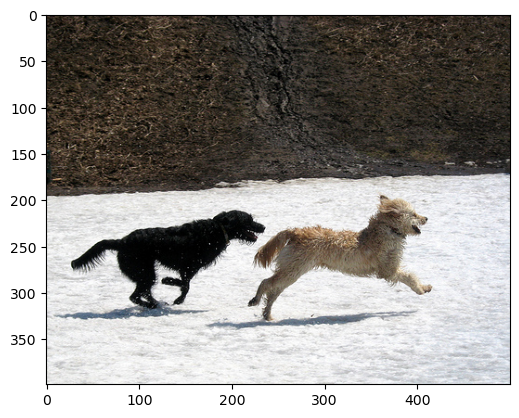

Sentence Length: 10
Word Frequencies: {'Two': 1, 'dogs': 1, 'running': 1, 'through': 1, 'a': 1, 'low': 1, 'lying': 1, 'body': 1, 'of': 1, 'water': 1}
Color Histogram: [2.8965902e-01 1.2639667e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0928045e-02 1.7116215e-03
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000

In [75]:
# Open de eerste afbeelding en laat alle kenmerken zien
import matplotlib.pyplot as plt

image = train_df['image'][0]
plt.imshow(image)
plt.show()

print("Sentence Length:", train_df['sentence_length'][0])
print("Word Frequencies:", train_df['word_frequencies'][0])
print("Color Histogram:", train_df['color_histogram'][0])
print("Texture Features:", train_df['texture_features'][0])



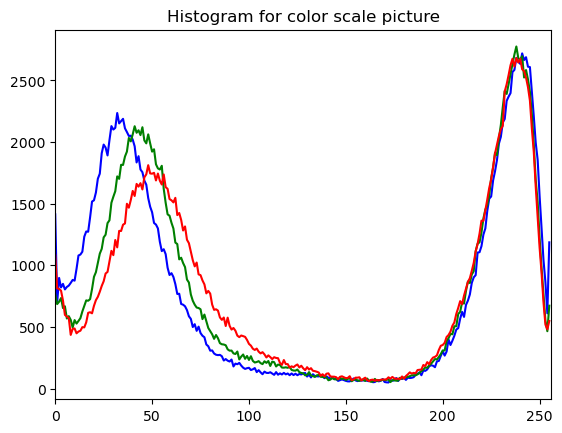

In [79]:
import cv2
import matplotlib.pyplot as plt

# Laad de afbeelding
image_path = train_df["filepath"][0]
img = cv2.imread(image_path)

# Bereken de kleurhistogrammen
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])

plt.title('Histogram for color scale picture')
plt.show()

Een kleurhistogram plot geeft een visuele representatie van de distributie van kleurintensiteiten in een afbeelding. Het toont de frequentie van elke kleurintensiteit voor elk kleurkanaal (rood, groen en blauw). Op de x-as worden de kleurintensiteiten weergegeven, variërend van 0 (geen intensiteit) tot 255 (maximale intensiteit). De y-as geeft het aantal pixels in de afbeelding weer met die specifieke kleurintensiteit.

Elke lijn in de plot vertegenwoordigt een kleurkanaal: rood, groen of blauw. Als een lijn piekt bij een bepaalde intensiteit, betekent dit dat er veel pixels in de afbeelding zijn met die specifieke kleurintensiteit. Bijvoorbeeld, als de rode lijn een piek heeft bij een hoge intensiteit, betekent dit dat er veel pixels in de afbeelding zijn met een hoge rode intensiteit, wat zou kunnen wijzen op de aanwezigheid van helder rood in de afbeelding.

Het is belangrijk op te merken dat deze histogrammen de kleurverdeling tonen op basis van afzonderlijke kleurkanalen, en niet de gecombineerde kleuren zoals we die normaal gesproken zien. Bijvoorbeeld, een pixel met maximale intensiteit in zowel het rode als het groene kanaal zou geel lijken, maar in deze histogrammen verschijnen als pieken in zowel het rode als het groene kanaal.

## Begin ML-pipeline